
# **Importing the libraries and Dataset**



In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import xgboost as xgb 
from sklearn.linear_model import LogisticRegression  
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, LeaveOneOut
from sklearn.metrics import mean_squared_error, roc_curve, accuracy_score
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer, classification_report

In [ ]:
#data = pd.read_csv("Brazilianleague.csv")
path ='/content/drive/MyDrive/Edu due 24 th/Brazilianleague.csv'
data = pd.read_csv(path)
data.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#url = 'https://drive.google.com/file/d/15hmG33pOuZx5UDCdGWRPSwsncxiXQwau/view?usp=sharing'
#df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

#**Data Preparation**

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4009 entries, 0 to 4009
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  4009 non-null   object        
 1   League   4009 non-null   object        
 2   Season   4009 non-null   int64         
 3   Date     4009 non-null   datetime64[ns]
 4   Time     4009 non-null   object        
 5   Home     4009 non-null   object        
 6   Away     4009 non-null   object        
 7   HG       4009 non-null   float64       
 8   AG       4009 non-null   float64       
 9   Res      4009 non-null   object        
 10  PH       4009 non-null   float64       
 11  PD       4009 non-null   float64       
 12  PA       4009 non-null   float64       
 13  MaxH     4009 non-null   float64       
 14  MaxD     4009 non-null   float64       
 15  MaxA     4009 non-null   float64       
 16  AvgH     4009 non-null   float64       
 17  AvgD     4009 non-null   float64 

In [ ]:
#Converting date data type from object to time
data ["Date"] = pd.to_datetime (data ["Date"], format = "%d/%m/%Y")
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4009 entries, 0 to 4009
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Country               4009 non-null   object        
 1   League                4009 non-null   object        
 2   Season                4009 non-null   int64         
 3   Date                  4009 non-null   datetime64[ns]
 4   Time                  4009 non-null   object        
 5   Home                  4009 non-null   object        
 6   Away                  4009 non-null   object        
 7   HG                    4009 non-null   float64       
 8   AG                    4009 non-null   float64       
 9   Res                   4009 non-null   object        
 10  PH                    4009 non-null   float64       
 11  PD                    4009 non-null   float64       
 12  PA                    4009 non-null   float64       
 13  MaxH              

,Season,HG,AG,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,...,AwayTeamWins,Homelastmatchwin,Awaylastmatchwin,HomeUndefeatedStreak,AwayUndefeatedStreak,HomeHistoricalPT,AwayHistoricalPT,Dif_HistoricalPT,Draw,Target
count,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,...,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000
mean,2016.788226,1.413071,0.944625,2.304460,3.654053,4.709187,2.384964,3.757648,4.968159,2.226845,...,0.241457,0.506111,0.490397,1.764779,2.090796,209.578698,209.928411,-0.349713,0.270142,0.753056
std,3.053466,1.156639,0.970846,0.958385,0.656428,2.510949,1.073422,0.683262,2.804615,0.893648,...,0.428020,0.500025,0.499970,2.743855,2.839210,165.385530,165.323969,181.716836,0.444088,0.817951
min,2012.000000,0.000000,0.000000,1.080000,2.540000,1.150000,1.090000,2.630000,0.000000,1.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-602.000000,0.000000,0.000000
25%,2014.000000,1.000000,0.000000,1.690000,3.260000,2.990000,1.740000,3.340000,3.060000,1.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,72.000000,-73.000000,0.000000,0.000000
50%,2017.000000,1.000000,1.000000,2.080000,3.450000,4.010000,2.150000,3.540000,4.150000,2.030000,...,0.000000,1.000000,0.000000,1.000000,1.000000,168.000000,168.000000,0.000000,0.000000,1.000000
75%,2019.000000,2.000000,1.000000,2.610000,3.860000,5.770000,2.700000,3.970000,6.100000,2.520000,...,0.000000,1.000000,1.000000,2.000000,3.000000,316.000000,316.000000,72.000000,1.000000,1.000000
max,2022.000000,6.000000,6.000000,17.680000,12.250000,29.580000,29.000000,12.500000,36.000000,20.230000,...,1.000000,1.000000,1.000000,31.000000,33.000000,667.000000,667.000000,596.000000,1.000000,2.000000


In [ ]:
data.tail(5)

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,AwayTeamWins,Homelastmatchwin,Awaylastmatchwin,HomeUndefeatedStreak,AwayUndefeatedStreak,HomeHistoricalPT,AwayHistoricalPT,Dif_HistoricalPT,Draw,Target
4005,Brazil,Serie A,2022,2022-08-07,20:00,Fluminense,Cuiaba,1.0,0.0,H,...,0,1,0,9,0,572,67,505,0,0
4006,Brazil,Serie A,2022,2022-08-07,20:00,Palmeiras,Goias,3.0,0.0,H,...,0,1,1,5,2,590,258,332,0,0
4007,Brazil,Serie A,2022,2022-08-07,22:00,Fortaleza,Internacional,3.0,0.0,H,...,0,1,1,2,1,170,549,-379,0,0
4008,Brazil,Serie A,2022,2022-08-07,23:00,Atletico-MG,Athletico-PR,2.0,3.0,A,...,1,0,1,0,1,667,198,469,0,2
4009,Brazil,Serie A,2022,2022-08-09,00:00,Coritiba,Santos,1.0,2.0,A,...,1,0,0,0,3,329,610,-281,0,2


In [ ]:
#Checking for the total number of null values in the dataframe
data.isnull().sum()

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         0
AG         0
Res        0
PH         0
PD         0
PA         0
MaxH       0
MaxD       0
MaxA       0
AvgH       0
AvgD       0
AvgA       0
dtype: int64

In [ ]:
#Dropping all the null values in the 0 axis 
data = data.dropna(axis=0)

data.isnull().sum()

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         0
AG         0
Res        0
PH         0
PD         0
PA         0
MaxH       0
MaxD       0
MaxA       0
AvgH       0
AvgD       0
AvgA       0
dtype: int64

#**Data analysis in the dataset**

In [ ]:
data.describe()

,Season,HG,AG,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
count,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000
mean,2016.788226,1.413071,0.944625,2.304460,3.654053,4.709187,2.384964,3.757648,4.968159,2.226845,3.484111,4.339474
std,3.053466,1.156639,0.970846,0.958385,0.656428,2.510949,1.073422,0.683262,2.804615,0.893648,0.568372,2.149194
min,2012.000000,0.000000,0.000000,1.080000,2.540000,1.150000,1.090000,2.630000,0.000000,1.070000,2.510000,1.150000
25%,2014.000000,1.000000,0.000000,1.690000,3.260000,2.990000,1.740000,3.340000,3.060000,1.650000,3.150000,2.860000
50%,2017.000000,1.000000,1.000000,2.080000,3.450000,4.010000,2.150000,3.540000,4.150000,2.030000,3.300000,3.730000
75%,2019.000000,2.000000,1.000000,2.610000,3.860000,5.770000,2.700000,3.970000,6.100000,2.520000,3.660000,5.320000
max,2022.000000,6.000000,6.000000,17.680000,12.250000,29.580000,29.000000,12.500000,36.000000,20.230000,10.820000,26.580000


In [ ]:
#Data is arranged in descending order
data["Res"].value_counts(normalize=True)*100

H    48.840110
D    27.014218
A    24.145672
Name: Res, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4009 entries, 0 to 4009
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  4009 non-null   object        
 1   League   4009 non-null   object        
 2   Season   4009 non-null   int64         
 3   Date     4009 non-null   datetime64[ns]
 4   Time     4009 non-null   object        
 5   Home     4009 non-null   object        
 6   Away     4009 non-null   object        
 7   HG       4009 non-null   float64       
 8   AG       4009 non-null   float64       
 9   Res      4009 non-null   object        
 10  PH       4009 non-null   float64       
 11  PD       4009 non-null   float64       
 12  PA       4009 non-null   float64       
 13  MaxH     4009 non-null   float64       
 14  MaxD     4009 non-null   float64       
 15  MaxA     4009 non-null   float64       
 16  AvgH     4009 non-null   float64       
 17  AvgD     4009 non-null   float64 

In [ ]:
data.head(5)

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,2012-05-19,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,2012-05-19,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,2012-05-20,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,2012-05-20,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,2012-05-20,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [ ]:
goals_home = data[["Season", "HG"]].groupby("Season").agg(lambda x: sum(x)).reset_index()
goals_home.rename(columns = {"HG":"goals_home"}, inplace=True)

goals_away = data[["Season", "AG"]].groupby("Season").agg(lambda x: sum(x)).reset_index()
goals_away.rename(columns = {"AG":"goals_away"}, inplace=True)


goals_season = pd.merge (goals_home, goals_away, on = "Season")
goals_season ["goals_total"] = goals_season["goals_home"] + goals_season["goals_away"]

goals_season["goals_home_perc"] = (goals_season["goals_home" ]/goals_season['goals_total']).mul(100).round(1).astype(str) + '%'
goals_season["goals_away_perc"] = (goals_season["goals_away" ]/goals_season['goals_total']).mul(100).round(1).astype(str) + '%'
Total_matches = data.groupby("Season").size()


goals_season=goals_season.merge(Total_matches.to_frame(), on = "Season")


goals_season.columns =["Season", "goals_home", "goals_away", "goals_total", "goals_home_perc", "goals_away_perc", "Total_matches" ]
goals_season["average_goals_home"] = goals_season["goals_home" ]/goals_season["Total_matches"]
goals_season["average_goals_away"] = goals_season["goals_away" ]/goals_season["Total_matches"]

goals_season


,Season,goals_home,goals_away,goals_total,goals_home_perc,goals_away_perc,Total_matches,average_goals_home,average_goals_away
0,2012,559.0,381.0,940.0,59.5%,40.5%,380,1.471053,1.002632
1,2013,558.0,378.0,936.0,59.6%,40.4%,380,1.468421,0.994737
2,2014,540.0,320.0,860.0,62.8%,37.2%,380,1.421053,0.842105
3,2015,555.0,342.0,897.0,61.9%,38.1%,380,1.460526,0.900000
4,2016,564.0,348.0,912.0,61.8%,38.2%,379,1.488127,0.918206
5,2017,526.0,397.0,923.0,57.0%,43.0%,380,1.384211,1.044737
6,2018,525.0,302.0,827.0,63.5%,36.5%,380,1.381579,0.794737
7,2019,525.0,351.0,876.0,59.9%,40.1%,380,1.381579,0.923684
8,2020,536.0,408.0,944.0,56.8%,43.2%,380,1.410526,1.073684
9,2021,483.0,359.0,842.0,57.4%,42.6%,380,1.271053,0.944737


In [ ]:
data1 = goals_season [["Season", "goals_home"]]
data2 = goals_season [["Season", "goals_away"]]
data3 = goals_season [[ "Season", "goals_total"]]

data1.rename(columns = {"goals_home" : "goals" }, inplace=True)
data2.rename(columns = {"goals_away": "goals" }, inplace=True)
data3.rename(columns = {"goals_total": "goals" }, inplace=True)
 
data1["type_goals"] = "goals_home"
data2["type_goals"] = "goals_away"
data3["type_goals"] = "goals_total"
data4 = pd.concat([data1, data2]).reset_index(drop=True)



 


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [ ]:
data4

,Season,goals,type_goals
0,2012,559.0,goals_home
1,2013,558.0,goals_home
2,2014,540.0,goals_home
3,2015,555.0,goals_home
4,2016,564.0,goals_home
5,2017,526.0,goals_home
6,2018,525.0,goals_home
7,2019,525.0,goals_home
8,2020,536.0,goals_home
9,2021,483.0,goals_home


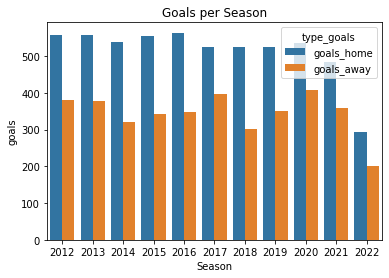

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.barplot(x="Season", y="goals", hue="type_goals", data=data4)
plt.title("Goals per Season")
plt.show()
from google. colab import files
plt. savefig("goals per season.png")
files. download("goals per season.png")

**Goals analysed by Teams**

In [ ]:

goals_home_team  = data.groupby("Home" )["HG"].mean().sort_values(ascending=False).reset_index()
goals_home_team.rename(columns  = {"Home" : "Team", "HG" : "Average Goals scored per match" }, inplace=True)
 
goals_away_team = data.groupby("Away")["AG"].mean().sort_values(ascending=False).reset_index()
goals_away_team.rename(columns = {"Away": "Team", "AG": "Average Goals scored per match" }, inplace=True)
 
goals_team = pd.concat([goals_home_team, goals_away_team])
goals_total_team = goals_team.groupby("Team")["Average Goals scored per match"].mean().sort_values(ascending=False).reset_index()
goals_total_team.head(10)




,Team,Average Goals scored per match
0,Atletico-MG,1.505750
1,Flamengo RJ,1.466928
2,Palmeiras,1.448242
3,Bragantino,1.410077
4,Santos,1.300784
5,Gremio,1.292105
6,Cruzeiro,1.286184
7,Atletico-PR,1.263158
8,Sao Paulo,1.259913
9,Internacional,1.246114


In [ ]:
import seaborn as sns

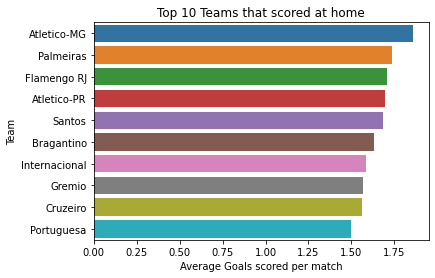

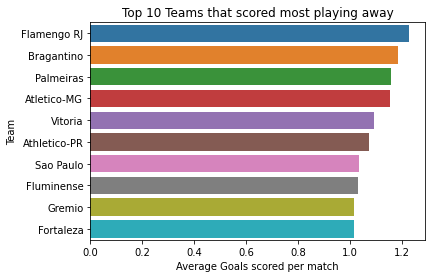

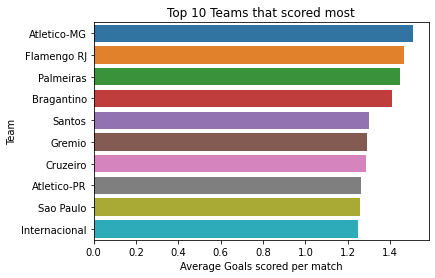

In [ ]:
sns.barplot(x="Average Goals scored per match", y="Team", data=goals_home_team.head(10))
plt.title("Top 10 Teams that scored at home")
plt.show()

sns.barplot(x="Average Goals scored per match", y="Team", data=goals_away_team.head(10))
plt.title("Top 10 Teams that scored most playing away")
plt.show()

sns.barplot(x="Average Goals scored per match", y="Team", data=goals_total_team.head(10))
plt.title("Top 10 Teams that scored most")
plt.show()


In [ ]:
goals_home_team  = data.groupby("Away" )["HG"].mean().sort_values(ascending=True).reset_index()
goals_home_team.rename(columns  = {"Away" : "Team", "HG" : "Average goals concerned per match" }, inplace=True)

goals_away_team = data.groupby("Home")["AG"].mean().sort_values(ascending=True).reset_index()
goals_away_team.rename(columns = {"Home": "Team", "AG": "Average goals concerned per match" }, inplace=True)
 
goals_team = pd.concat([goals_home_team, goals_away_team])
goals_total_team = goals_team.groupby("Team")["Average goals concerned per match"].mean().sort_values(ascending=True).reset_index()
goals_total_team.head(10)

,Team,Average goals concerned per match
0,Corinthians,0.909751
1,Gremio,0.950000
2,Athletico-PR,0.998464
3,Cuiaba,0.998851
4,Santos,1.017998
5,Internacional,1.046354
6,Sao Paulo,1.046791
7,Flamengo RJ,1.081803
8,Cruzeiro,1.082237
9,Palmeiras,1.083010


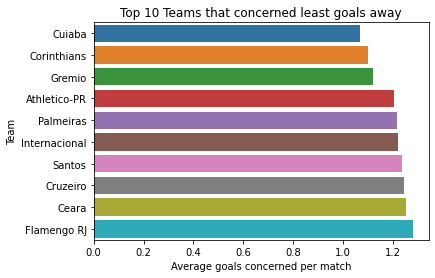

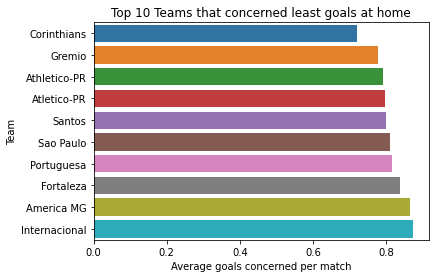

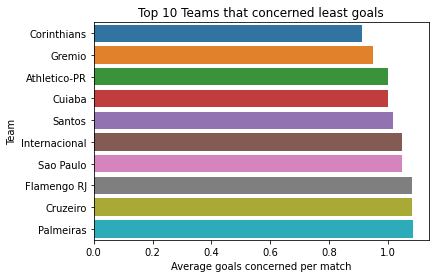

In [ ]:
sns.barplot(x="Average goals concerned per match", y="Team", data=goals_home_team.head(10))
plt.title("Top 10 Teams that concerned least goals away")
plt.show()

sns.barplot(x="Average goals concerned per match", y="Team", data=goals_away_team.head(10))
plt.title("Top 10 Teams that concerned least goals at home")
plt.show()

sns.barplot(x="Average goals concerned per match", y="Team", data=goals_total_team.head(10))
plt.title("Top 10 Teams that concerned least goals")
plt.show()

#**Features and Target creation**

In [ ]:
def converter0 (column):
  if column == "H":
    return True
  else:
    return False
def converter1 (column):
  if column == "A":
    return True
  else:
    return False

data ["HomeTeamWins"] =data ["Res"].apply(converter0)
data ["AwayTeamWins"] =data ["Res"].apply(converter1)

data.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,AwayTeamWins,Homelastmatchwin,Awaylastmatchwin,HomeUndefeatedStreak,AwayUndefeatedStreak,HomeHistoricalPT,AwayHistoricalPT,Dif_HistoricalPT,Draw,Target
0,Brazil,Serie A,2012,2012-05-19,22:30,Palmeiras,Portuguesa,1.0,1.0,D,...,False,0,0,0,0,0,0,0,1,1
1,Brazil,Serie A,2012,2012-05-19,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,...,False,0,0,0,0,0,0,0,1,1
2,Brazil,Serie A,2012,2012-05-20,01:00,Figueirense,Nautico,2.0,1.0,H,...,False,0,0,0,0,0,0,0,0,0
3,Brazil,Serie A,2012,2012-05-20,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,...,False,0,0,0,0,0,0,0,0,0
4,Brazil,Serie A,2012,2012-05-20,20:00,Corinthians,Fluminense,0.0,1.0,A,...,True,0,0,0,0,0,0,0,0,2


In [ ]:
data ["Homelastmatchwin"] = False
data ["Awaylastmatchwin"] = False

from collections import defaultdict
won_last = defaultdict (int)

for index, row in data.iterrows():
  home_team = row ["Home"]
  away_team = row ["Away"]
  row ["Homelastmatchwin"] = won_last [home_team]
  row ["Awaylastmatchwin"] = won_last [away_team]
  data.loc[index] = row
  won_last [home_team] = row ["HomeTeamWins"]
  won_last [away_team] = not row ["HomeTeamWins"]

 

In [ ]:
 data.tail()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,AwayTeamWins,Homelastmatchwin,Awaylastmatchwin,HomeUndefeatedStreak,AwayUndefeatedStreak,HomeHistoricalPT,AwayHistoricalPT,Dif_HistoricalPT,Draw,Target
4005,Brazil,Serie A,2022,2022-08-07,20:00,Fluminense,Cuiaba,1.0,0.0,H,...,False,True,False,9,0,572,67,505,0,0
4006,Brazil,Serie A,2022,2022-08-07,20:00,Palmeiras,Goias,3.0,0.0,H,...,False,True,True,5,2,590,258,332,0,0
4007,Brazil,Serie A,2022,2022-08-07,22:00,Fortaleza,Internacional,3.0,0.0,H,...,False,True,True,2,1,170,549,-379,0,0
4008,Brazil,Serie A,2022,2022-08-07,23:00,Atletico-MG,Athletico-PR,2.0,3.0,A,...,True,False,True,0,1,667,198,469,0,2
4009,Brazil,Serie A,2022,2022-08-09,00:00,Coritiba,Santos,1.0,2.0,A,...,True,False,False,0,3,329,610,-281,0,2


In [ ]:
data ["HomeUndefeatedStreak"] = 0
data ["AwayUndefeatedStreak"] = 0

from collections import defaultdict
undefeated_streak = defaultdict (int)

for index, row in data.iterrows():
  home_team = row["Home"]
  away_team = row ["Away"]
  row ["HomeUndefeatedStreak"] = undefeated_streak [home_team]
  row ["AwayUndefeatedStreak"] = undefeated_streak[away_team]
  data.loc[index] = row
  if row ["HomeTeamWins"]:  #For the victory of the home team increase the home team streak
    undefeated_streak[home_team] += 1
    undefeated_streak[away_team] = 0
  elif row ["AwayTeamWins"]: #For the victory of the away team increase the home team streak
    undefeated_streak[home_team] = 0
    undefeated_streak[away_team] +=1
  else: #For a draw increase both streak
    undefeated_streak[home_team] += 1
    undefeated_streak [away_team] += 1




In [ ]:
data.loc[3312:3352][["Season","Home", "Away", "HG", "AG","HomeUndefeatedStreak","AwayUndefeatedStreak"]]

,Season,Home,Away,HG,AG,HomeUndefeatedStreak,AwayUndefeatedStreak
3312,2020,Bragantino,Sao Paulo,4.0,2.0,0,2
3313,2020,Flamengo RJ,Fluminense,1.0,2.0,6,0
3314,2020,Ceara,Internacional,0.0,2.0,2,5
3315,2020,Atletico GO,Vasco,0.0,0.0,0,0
3316,2020,Coritiba,Athletico-PR,0.0,0.0,0,3
3317,2020,Sport Recife,Palmeiras,0.0,1.0,1,1
3318,2020,Fortaleza,Gremio,0.0,0.0,0,13
3319,2020,Flamengo RJ,Ceara,0.0,2.0,0,0
3320,2020,Sao Paulo,Santos,0.0,1.0,0,1
3321,2020,Atletico GO,Bahia,1.0,1.0,1,0


In [ ]:
data ["HomeHistoricalPT"] = 0
data ["AwayHistoricalPT"] = 0

from collections import defaultdict
historical_Pt = defaultdict (int)

for index, row in data.iterrows():
  home_team = row["Home"]
  away_team = row ["Away"]
  row ["HomeHistoricalPT"] = historical_Pt [home_team]
  row ["AwayHistoricalPT"] = historical_Pt [away_team]
  data.loc[index] = row
  if row ["HomeTeamWins"]:  #For the victory of the home team increase 3 points
    historical_Pt[home_team] += 3
    historical_Pt[away_team] += 0
  elif row ["AwayTeamWins"]: #For the victory of the away team increase increase 3 points
    historical_Pt[home_team] += 0
    historical_Pt[away_team] += 3
  else: #For a draw increase 1 point for both team
    historical_Pt[home_team] += 1
    historical_Pt[away_team] += 1



In [ ]:
data["Dif_HistoricalPT"] = data["HomeHistoricalPT"] - data["AwayHistoricalPT"]

data.tail(50)[["Home", "Away", "HG", "AG", "HomeHistoricalPT","AwayHistoricalPT", "Dif_HistoricalPT"]]

,Home,Away,HG,AG,HomeHistoricalPT,AwayHistoricalPT,Dif_HistoricalPT
3960,Athletico-PR,Internacional,0.0,0.0,191,544,-353
3961,Avai,Santos,1.0,0.0,123,605,-482
3962,Flamengo RJ,Coritiba,2.0,0.0,652,326,326
3963,Ceara,Corinthians,3.0,1.0,203,621,-418
3964,Juventude,Goias,0.0,0.0,58,253,-195
3965,Sao Paulo,Fluminense,2.0,2.0,613,564,49
3966,Atletico GO,Fortaleza,0.0,1.0,186,163,23
3967,Botafogo RJ,Atletico-MG,0.0,1.0,404,663,-259
3968,America MG,Bragantino,0.0,3.0,139,130,9
3969,Palmeiras,Cuiaba,1.0,0.0,578,66,512


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import poisson,skellam

#epl_1617 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv")
#epl_1617 = epl_1617[['HomeTeam','AwayTeam','FTHG','FTAG']]
#epl_1617 = epl_1617.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
#epl_1617.head()

Creating Targets = We will create 3 differents targets columns. The first one tell us if the home team win (1) or not (0) (Column name: HomeTeamWin). 
Second one tell us if the away team win (1) or not (0) (Column name: AwayTeamWin). 
Third one tell us if the match is a draw (1) or not (0). (Column name: Draw)


In [ ]:
def converter2 (column):
  if column == True:
    return 1

  else:
    return 0

def converter3 (column):
  if column == "D":
    return 1

  else:
    return 0


data ["Homelastmatchwin"] =data ["Homelastmatchwin"].apply(converter2)
data ["Awaylastmatchwin"] =data ["Awaylastmatchwin"].apply(converter2)

data["HomeTeamWins"] = data["HomeTeamWins"].apply(converter2)
data ["AwayTeamWins"] = data ["AwayTeamWins"].apply(converter2)
data ["Draw"] = data ["Res"].apply(converter3)
data.tail()



,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,AwayTeamWins,Homelastmatchwin,Awaylastmatchwin,HomeUndefeatedStreak,AwayUndefeatedStreak,HomeHistoricalPT,AwayHistoricalPT,Dif_HistoricalPT,Draw,Target
4005,Brazil,Serie A,2022,2022-08-07,20:00,Fluminense,Cuiaba,1.0,0.0,H,...,0,1,0,9,0,572,67,505,0,0
4006,Brazil,Serie A,2022,2022-08-07,20:00,Palmeiras,Goias,3.0,0.0,H,...,0,1,1,5,2,590,258,332,0,0
4007,Brazil,Serie A,2022,2022-08-07,22:00,Fortaleza,Internacional,3.0,0.0,H,...,0,1,1,2,1,170,549,-379,0,0
4008,Brazil,Serie A,2022,2022-08-07,23:00,Atletico-MG,Athletico-PR,2.0,3.0,A,...,1,0,1,0,1,667,198,469,0,2
4009,Brazil,Serie A,2022,2022-08-09,00:00,Coritiba,Santos,1.0,2.0,A,...,1,0,0,0,3,329,610,-281,0,2


In [ ]:
def converter4 (column):
  if column == "H":
    return 0   # 0 for the Home team wins 
  elif column == "D":
    return 1   # 1 for a draw

  else:
    return 2   # 2 for the away team wins

data ["Target"] = data ["Res"].apply(converter4)

data.tail(10)

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,AwayTeamWins,Homelastmatchwin,Awaylastmatchwin,HomeUndefeatedStreak,AwayUndefeatedStreak,HomeHistoricalPT,AwayHistoricalPT,Dif_HistoricalPT,Draw,Target
4000,Brazil,Serie A,2022,2022-08-06,20:30,Botafogo RJ,Ceara,1.0,1.0,D,...,0,0,0,0,0,407,209,198,1,1
4001,Brazil,Serie A,2022,2022-08-06,20:30,Juventude,America MG,0.0,1.0,A,...,1,0,1,0,2,62,145,-83,0,2
4002,Brazil,Serie A,2022,2022-08-06,23:00,Atletico GO,Bragantino,2.0,1.0,H,...,0,0,1,0,1,186,139,47,0,0
4003,Brazil,Serie A,2022,2022-08-06,23:00,Avai,Corinthians,1.0,1.0,D,...,0,0,1,0,3,126,630,-504,1,1
4004,Brazil,Serie A,2022,2022-08-07,00:30,Sao Paulo,Flamengo RJ,0.0,2.0,A,...,1,0,1,0,4,616,664,-48,0,2
4005,Brazil,Serie A,2022,2022-08-07,20:00,Fluminense,Cuiaba,1.0,0.0,H,...,0,1,0,9,0,572,67,505,0,0
4006,Brazil,Serie A,2022,2022-08-07,20:00,Palmeiras,Goias,3.0,0.0,H,...,0,1,1,5,2,590,258,332,0,0
4007,Brazil,Serie A,2022,2022-08-07,22:00,Fortaleza,Internacional,3.0,0.0,H,...,0,1,1,2,1,170,549,-379,0,0
4008,Brazil,Serie A,2022,2022-08-07,23:00,Atletico-MG,Athletico-PR,2.0,3.0,A,...,1,0,1,0,1,667,198,469,0,2
4009,Brazil,Serie A,2022,2022-08-09,00:00,Coritiba,Santos,1.0,2.0,A,...,1,0,0,0,3,329,610,-281,0,2


#**Feature and Target transformations**

In [ ]:
!pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
encoding = LabelEncoder ()
encoding.fit (data["Home"].values)

LabelEncoder()

In [ ]:
def onehot_encode (data, columns, prefixes):
  data = data.copy()
  for column, prefix in zip(columns, prefixes):
    dumies = pd.get_dummies(data[column],prefix=prefix)
    data = pd.concat ([data, dumies], axis=1)
    data = data.drop (column, axis =1)

In [ ]:
newdata = data[["HG", "AG", "Home", "Away", "HomeTeamWins","AwayTeamWins","Draw", "Homelastmatchwin", "Awaylastmatchwin", "HomeUndefeatedStreak", "AwayUndefeatedStreak", "Dif_HistoricalPT", "Target"]]

In [ ]:
# Removing all the first championship for the data of the the first season dont be used, the features are not with values it could get wrong results.
newdata = newdata.iloc[381:]

newdata.head(10)

,HG,AG,Home,Away,HomeTeamWins,AwayTeamWins,Draw,Homelastmatchwin,Awaylastmatchwin,HomeUndefeatedStreak,AwayUndefeatedStreak,Dif_HistoricalPT,Target
381,2.0,2.0,Vitoria,Internacional,0,0,1,0,1,0,1,-52,1
382,1.0,1.0,Corinthians,Botafogo RJ,0,0,1,0,1,0,1,2,1
383,3.0,1.0,Criciuma,Bahia,1,0,0,0,1,0,3,-47,0
384,2.0,0.0,Gremio,Nautico,1,0,0,0,1,15,2,22,0
385,0.0,2.0,Ponte Preta,Sao Paulo,0,1,0,1,1,2,3,-18,2
386,0.0,0.0,Santos,Flamengo RJ,0,0,1,1,0,3,9,3,1
387,2.0,1.0,Coritiba,Atletico-MG,1,0,0,1,1,1,4,-24,0
388,5.0,0.0,Cruzeiro,Goias,1,0,0,0,0,0,0,52,0
389,2.0,1.0,Fluminense,Atletico-PR,1,0,0,0,0,0,0,77,0
390,2.0,2.0,Atletico-PR,Cruzeiro,0,0,1,0,1,0,1,-55,1


In [ ]:
corrs = newdata.corr()
corrs
import plotly.figure_factory as pff
correlation = pff.create_annotated_heatmap( z = corrs.values, x = list(corrs.columns), y = list(corrs.index), annotation_text=corrs.round(3).values, showscale=True)
correlation.show()

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(newdata["Home"])

newdata["Home"] = le.transform (newdata["Home"])
newdata ["Away"] = le.transform (newdata["Away"])


newdata.tail(30)

,HG,AG,Home,Away,HomeTeamWins,AwayTeamWins,Draw,Homelastmatchwin,Awaylastmatchwin,HomeUndefeatedStreak,AwayUndefeatedStreak,Dif_HistoricalPT,Target
3980,3.0,3.0,33,21,0,0,1,1,0,5,0,361,1
3981,2.0,0.0,7,1,1,0,0,0,1,0,2,209,0
3982,1.0,2.0,5,18,0,1,0,0,1,0,2,-532,2
3983,2.0,1.0,19,8,1,0,0,1,1,7,3,432,0
3984,1.0,0.0,25,10,1,0,0,0,1,0,2,-150,0
3985,2.0,1.0,27,23,1,0,0,1,0,3,5,38,0
3986,0.0,1.0,2,0,0,1,0,0,0,0,0,47,2
3987,1.0,2.0,3,12,0,1,0,1,1,8,1,43,2
3988,0.0,0.0,20,32,0,0,1,0,1,0,1,-442,1
3989,1.0,0.0,13,16,1,0,0,0,0,0,1,259,0


In [ ]:
X = newdata.drop(["HG", "AG", "HomeTeamWins", "AwayTeamWins", "Draw" , "Target"], axis =1)
y1 = newdata["HomeTeamWins"] #Victory of the Home team
y2 = newdata["AwayTeamWins"] #Victory of the Away team
y3 = newdata ["Draw"]   #Match ending in a Draw

y4 = newdata ["Target"]
X.tail(10)




,Home,Away,Homelastmatchwin,Awaylastmatchwin,HomeUndefeatedStreak,AwayUndefeatedStreak,Dif_HistoricalPT
4000,7,10,0,0,0,0,198
4001,25,0,0,1,0,2,-83
4002,2,8,0,1,0,1,47
4003,5,12,0,1,0,3,-504
4004,33,18,0,1,0,4,-48
4005,19,16,1,0,9,0,505
4006,27,21,1,1,5,2,332
4007,20,23,1,1,2,1,-379
4008,3,1,0,1,0,1,469
4009,13,32,0,0,0,3,-281


#**Evalueting the models**

In [ ]:

scorer = make_scorer (f1_score, pos_label=None, average= "weighted") #we care about results overall

#First doing a classificator for the Victory of Home team

models = [GaussianNB(), DecisionTreeClassifier(),  RandomForestClassifier() ]
names = ["Naive Bayes", "Decision Tree",  "Random Forest"]
for model, name in zip(models, names):
    print (name)
    start = time.time()
    for score in ["accuracy", "precision", "recall"]:
        print (score, ":", cross_val_score(model, X, y1 ,scoring=scorer, cv=5).mean())
    print (time.time() - start)

Naive Bayes
accuracy : 0.5585419200385429
precision : 0.5585419200385429
recall : 0.5585419200385429
0.11279106140136719
Decision Tree
accuracy : 0.5218521602455202
precision : 0.5191947981682444
recall : 0.5148204491333979
0.2726783752441406
Random Forest
accuracy : 0.5360580606754509
precision : 0.5313570764808191
recall : 0.537791389467052
7.231105327606201


Best Classificator is  ('GaussianNB', 0.5802757708835057)


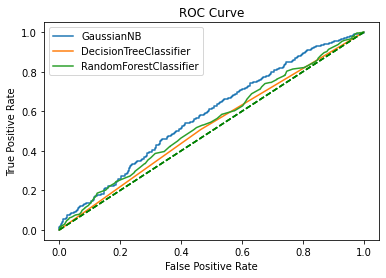

In [ ]:
def plotcurve_ROC (fp, tp, model):
  plt.plot (fp, tp, label=type (model).__name__)
  plt.plot([0,1], [0,1], color="green", linestyle="--")
  plt.xlabel ("False Positive Rate")
  plt.ylabel ("True Positive Rate")
  plt.title ("ROC Curve")
  plt.legend()

best_classificator = ("",0)

Xtrain, Xtest, ytrain, ytest = train_test_split (X, y1, test_size = 0.3, random_state = 0)
for model in models:
  model.fit (Xtrain, ytrain)
  yp = model.predict_proba (Xtest)
  yp = yp [:, 1]
  fp, tp, thresholds = roc_curve (ytest, yp)

  #ROC = Receiving Operating Characteristics
  plotcurve_ROC (fp, tp, model)

  #AUC = Area Under Curve - As bigger is the Area, best is the classificator - as much close to 1
  auc = np.trapz(tp, fp)
  if auc > best_classificator[1]:
                 best_classificator = (type(model).__name__, auc)
print ("Best Classificator is ", best_classificator )
plt.show()         






In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtest_scaler = scaler.fit_transform (Xtest)
Xtrain_scaler = scaler.fit_transform (Xtrain)


pd.DataFrame (Xtest_scaler, columns = X.columns).head()
#Xtrain_scaler=pd.DataFrame (Xtrain_scaler, columns = X.columns).head()



,Home,Away,Homelastmatchwin,Awaylastmatchwin,HomeUndefeatedStreak,AwayUndefeatedStreak,Dif_HistoricalPT
0,0.888889,0.333333,0.0,1.0,0.000000,0.030303,0.478705
1,0.916667,0.944444,0.0,0.0,0.000000,0.000000,0.623509
2,0.138889,0.972222,0.0,1.0,0.000000,0.151515,0.431005
3,0.777778,1.000000,0.0,0.0,0.000000,0.000000,0.341567
4,0.972222,0.944444,1.0,1.0,0.032258,0.151515,0.469336


Classification report:
Accuracy:  0.5564738292011019
              precision    recall  f1-score   support

           0       0.61      0.55      0.58       601
           1       0.50      0.56      0.53       488

    accuracy                           0.56      1089
   macro avg       0.56      0.56      0.56      1089
weighted avg       0.56      0.56      0.56      1089

Confusion matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



<Figure size 576x576 with 0 Axes>

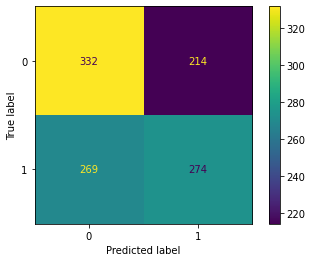

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, plot_confusion_matrix, f1_score
model = GaussianNB().fit(Xtrain, ytrain)  



yp =model.predict(Xtest)
accuracy = accuracy_score(ytest,yp)
report = classification_report(yp, ytest)
CM = confusion_matrix(ytest, yp)

print("Classification report:")
print("Accuracy: ",accuracy)
print(report)
print("Confusion matrix:")
plt.figure (figsize=(8,8))
plot_confusion_matrix(model, Xtest, ytest)
plt.show()

Text(51.0, 0.5, 'Real values')

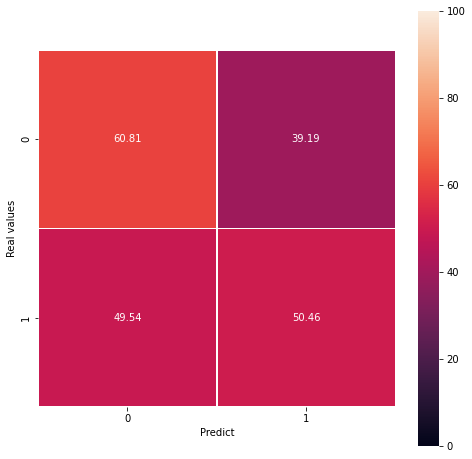

In [ ]:
##Confusion matrix by %

perc = (CM*100.0)/np.array(np.matrix(CM.sum(axis=1)).T)

plt.figure(figsize=(8,8))
CM1 = pd.DataFrame (perc)

sns.heatmap(CM1, vmax=100, vmin=0, annot=True, square = True, fmt=".2f", linewidths=.5)
plt.xlabel ("Predict")
plt.ylabel ("Real values")

Classification report:
Accuracy:  0.559228650137741
              precision    recall  f1-score   support

           0       0.57      0.56      0.56       556
           1       0.55      0.56      0.55       533

    accuracy                           0.56      1089
   macro avg       0.56      0.56      0.56      1089
weighted avg       0.56      0.56      0.56      1089

Confusion matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



<Figure size 576x576 with 0 Axes>

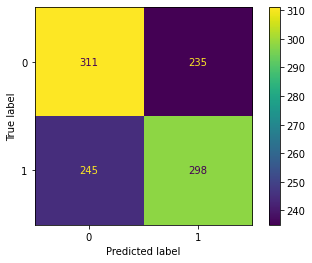

In [ ]:

model = GaussianNB().fit(Xtrain_scaler, ytrain)  



yp =model.predict(Xtest_scaler)
accuracy = accuracy_score(ytest,yp)
report = classification_report(yp, ytest)
CM = confusion_matrix(ytest, yp)

print("Classification report:")
print("Accuracy: ",accuracy)
print(report)
print("Confusion matrix:")
plt.figure (figsize=(8,8))
plot_confusion_matrix(model, Xtest_scaler, ytest)
plt.show()

Text(51.0, 0.5, 'Real values')

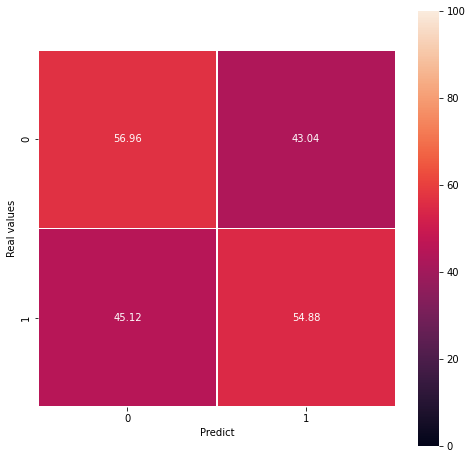

In [ ]:
##Confusion matrix by %

perc = (CM*100.0)/np.array(np.matrix(CM.sum(axis=1)).T)

plt.figure(figsize=(8,8))
CM1 = pd.DataFrame (perc)

sns.heatmap(CM1, vmax=100, vmin=0, annot=True, square = True, fmt=".2f", linewidths=.5)
plt.xlabel ("Predict")
plt.ylabel ("Real values")

In [ ]:
 #acc = sc.accumulator(0)
Xtrain, Xtest, ytrain, ytest = train_test_split (X, y4, test_size = 0.3, random_state = 0)
model = LogisticRegression (multi_class = "multinomial", max_iter=2000)
model.fit (Xtrain_scaler, ytrain)
yp = model.predict (Xtest_scaler)

accuracy = accuracy_score (ytest, yp)
f1 = f1_score(ytest, yp, average = "micro")
print ("Accuracy:{} ".format (accuracy))
print ("F1 Score:{}".format (f1))



Accuracy:0.4986225895316804 
F1 Score:0.4986225895316804


Classification report:
Accuracy:  0.4986225895316804
              precision    recall  f1-score   support

           0       0.97      0.51      0.67      1039
           1       0.00      0.00      0.00         0
           2       0.06      0.32      0.11        50

    accuracy                           0.50      1089
   macro avg       0.35      0.28      0.26      1089
weighted avg       0.93      0.50      0.64      1089

Confusion matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: Conf

<Figure size 576x576 with 0 Axes>

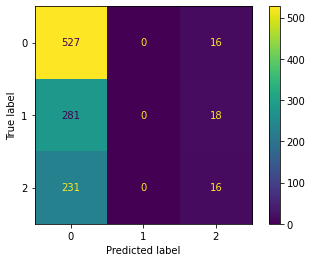

In [ ]:

report = classification_report(yp, ytest)
CM = confusion_matrix(ytest, yp)

print("Classification report:")
print("Accuracy: ",accuracy)
print(report)
print("Confusion matrix:")
plt.figure (figsize=(8,8))
plot_confusion_matrix(model, Xtest_scaler, ytest)
plt.show()

In [ ]:
#the entire first season is removed so the variables that were created don't start with null or irrelevant values.

newdata = newdata.iloc[381:]

newdata.head(10)

,HG,AG,Home,Away,HomeTeamWins,AwayTeamWins,Draw,Homelastmatchwin,Awaylastmatchwin,HomeUndefeatedStreak,AwayUndefeatedStreak,Dif_HistoricalPT,Target
762,0.0,0.0,11,13,0,0,1,0,1,0,3,-96,1
763,0.0,0.0,3,12,0,0,1,0,0,3,0,22,1
764,1.0,0.0,4,22,1,0,0,1,1,1,5,-72,0
765,1.0,2.0,6,15,0,1,0,0,1,0,1,-33,2
766,3.0,0.0,33,7,1,0,0,0,1,0,1,0,0
767,1.0,2.0,14,27,0,1,0,0,0,0,0,12,2
768,0.0,0.0,18,21,0,0,1,0,0,1,0,40,1
769,1.0,1.0,32,34,0,0,1,1,0,3,0,69,1
770,0.0,0.0,13,32,0,0,1,1,0,4,4,-14,1
771,0.0,1.0,27,19,0,1,0,1,1,1,3,-89,2


Accuracy:0.37333333333333335 
F1 Score:0.37333333333333335
Classification report:
Accuracy:  0.37333333333333335
              precision    recall  f1-score   support

           0       0.50      0.48      0.49       475
           1       0.29      0.27      0.28       278
           2       0.23      0.27      0.25       222

    accuracy                           0.37       975
   macro avg       0.34      0.34      0.34       975
weighted avg       0.38      0.37      0.38       975

Confusion matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



<Figure size 576x576 with 0 Axes>

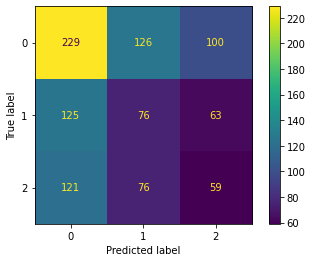

In [ ]:
X = newdata.drop(["HG", "AG", "HomeTeamWins", "AwayTeamWins", "Draw" , "Target"], axis =1)
y1 = newdata["HomeTeamWins"] #Victory of the Home team
y2 = newdata["AwayTeamWins"] #Victory of the Away team
y3 = newdata ["Draw"]   #Match ending in a Draw

y4 = newdata ["Target"]

Xtrain, Xtest, ytrain, ytest = train_test_split (X, y4, test_size = 0.3, random_state = 0)
model = DecisionTreeClassifier ()
model.fit (Xtrain, ytrain)
yp = model.predict (Xtest)

accuracy = accuracy_score (ytest, yp)
f1 = f1_score(ytest, yp, average = "micro")
print ("Accuracy:{} ".format (accuracy))
print ("F1 Score:{}".format (f1))


report = classification_report(yp, ytest)
CM = confusion_matrix(ytest, yp)

print("Classification report:")
print("Accuracy: ",accuracy)
print(report)
print("Confusion matrix:")
plt.figure (figsize=(8,8))
plot_confusion_matrix(model, Xtest, ytest)
plt.show()

In [ ]:

for i in zip (X.columns, model.feature_importances_):
  print (i)

('Home', 0.18441620784583157)
('Away', 0.18458264595143037)
('Homelastmatchwin', 0.030212280780404967)
('Awaylastmatchwin', 0.02401521361360725)
('HomeUndefeatedStreak', 0.10234506706742566)
('AwayUndefeatedStreak', 0.1200456325386548)
('Dif_HistoricalPT', 0.35438295220264554)


Using a multiclass model (Logistic Regression) with the "Target" 

::#TESTE